In [1]:
import pandas as pd
from data_preprocessor import preprocess, preprocess_test

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
train

,Transaction_Id,Date_Time,Phone_Number,CNIC,Name,Type,Amount,ID_Source,Old_Balance,New_Balance,...,Device_Name,IMEI,KYC_Status,Service_Charges,Channel,Remarks,ID_Dest,Dest_State,Dest_City,Is_Fraud
0,262874940,2025-11-22 07:51:50,+92 316-5932748,40734-8820668-3,Fariha Mirza,PAYMENT,17401.97,C1715563227,9987.00,0.00,...,Xiaomi Mi 11,601635731712294,On-Hold,34.80394,Mobile Payments,Utility bill payment,M1855643329,Balochistan,Dera Bugti,0
1,6834955376,2024-03-09 11:30:56,+92 342-0857831,98640-3954904-0,Fatima Jamil,CASH_IN,151145.79,C66604059,583610.05,734755.84,...,Samsung Galaxy S21,306719035281287,Registered,302.29158,E-Wallet,NaN,C1100020902,Azad Kashmir,Muzaffarabad,0
2,5820919584,2025-02-15 11:34:51,+92 320-9187475,79385-3769551-6,Nashit Farooq,CASH_IN,238859.05,C1737049760,7258146.94,7497006.00,...,OnePlus 9,820352773989048,Under Process,477.71810,Mobile Payments,NaN,C1689262323,Khyber Pakhtunkhwa,Nowshera,0
3,5827096489,2020-11-27 04:25:26,+92 329-3789139,89731-6421250-1,Sara Shah,PAYMENT,6118.97,C603812033,0.00,0.00,...,Xiaomi Mi 11,752913587095763,Under Process,12.23794,Credit Card,NaN,M2072651795,Punjab,Rawalpindi,0
4,8916324862,2022-01-27 00:14:31,+92 312-1162936,21250-7598754-2,Nashit Ahmed,CASH_OUT,100183.83,C1212213427,0.00,0.00,...,iPhone 13,904552660925197,Validated,200.36766,Bank Transfer,Travel ticket booking,C12858403,Balochistan,Turbat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653829,2722919019,2021-04-26 11:40:07,+92 338-2509642,58790-3086580-0,Nida Bhatti,CASH_OUT,44573.57,C583822146,0.00,0.00,...,Xiaomi Mi 11,776779042510125,Registered,89.14714,E-Wallet,NaN,C1245351228,Islamabad Capital Territory,Islamabad,0
4653830,6607069781,2024-03-27 20:47:06,+92 300-8707839,65221-7361610-5,Zain Farooq,PAYMENT,10297.68,C1571529469,101728.00,91430.32,...,OnePlus 9,199471659745619,Registered,20.59536,Credit Card,NaN,M2016342636,Islamabad Capital Territory,Islamabad,0
4653831,1277780926,2022-07-21 00:26:11,+92 302-0893772,47706-7271291-1,Muneeb Ali,CASH_IN,46029.38,C240616150,4637236.21,4683265.60,...,Samsung Galaxy S21,67719158264222,Under Process,92.05876,E-Wallet,NaN,C2041586859,Sindh,Larkana,0
4653832,1801941628,2019-09-09 11:37:53,+92 325-0724292,17274-2010642-9,Maira Ali,CASH_IN,152597.49,C1909900203,52684.00,205281.49,...,Xiaomi Mi 11,944786865930901,Under Process,305.19498,Credit Card,Travel ticket booking,C1360921062,Sindh,Sukkur,0


In [5]:
test['Is_Fraud'].value_counts()

Is_Fraud
0    1906298
1       2488
Name: count, dtype: int64

In [6]:
x_train = train.drop(['Is_Fraud'],axis = 1)
y_train = train['Is_Fraud']


x_test = test.drop(['Is_Fraud'],axis = 1)
y_test = test['Is_Fraud']

In [7]:
x_train

,Transaction_Id,Date_Time,Phone_Number,CNIC,Name,Type,Amount,ID_Source,Old_Balance,New_Balance,...,Source_City,Device_Name,IMEI,KYC_Status,Service_Charges,Channel,Remarks,ID_Dest,Dest_State,Dest_City
0,262874940,2025-11-22 07:51:50,+92 316-5932748,40734-8820668-3,Fariha Mirza,PAYMENT,17401.97,C1715563227,9987.00,0.00,...,Dera Bugti,Xiaomi Mi 11,601635731712294,On-Hold,34.80394,Mobile Payments,Utility bill payment,M1855643329,Balochistan,Dera Bugti
1,6834955376,2024-03-09 11:30:56,+92 342-0857831,98640-3954904-0,Fatima Jamil,CASH_IN,151145.79,C66604059,583610.05,734755.84,...,Islamabad,Samsung Galaxy S21,306719035281287,Registered,302.29158,E-Wallet,NaN,C1100020902,Azad Kashmir,Muzaffarabad
2,5820919584,2025-02-15 11:34:51,+92 320-9187475,79385-3769551-6,Nashit Farooq,CASH_IN,238859.05,C1737049760,7258146.94,7497006.00,...,Kohat,OnePlus 9,820352773989048,Under Process,477.71810,Mobile Payments,NaN,C1689262323,Khyber Pakhtunkhwa,Nowshera
3,5827096489,2020-11-27 04:25:26,+92 329-3789139,89731-6421250-1,Sara Shah,PAYMENT,6118.97,C603812033,0.00,0.00,...,Hyderabad,Xiaomi Mi 11,752913587095763,Under Process,12.23794,Credit Card,NaN,M2072651795,Punjab,Rawalpindi
4,8916324862,2022-01-27 00:14:31,+92 312-1162936,21250-7598754-2,Nashit Ahmed,CASH_OUT,100183.83,C1212213427,0.00,0.00,...,Gwadar,iPhone 13,904552660925197,Validated,200.36766,Bank Transfer,Travel ticket booking,C12858403,Balochistan,Turbat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653829,2722919019,2021-04-26 11:40:07,+92 338-2509642,58790-3086580-0,Nida Bhatti,CASH_OUT,44573.57,C583822146,0.00,0.00,...,Gilgit,Xiaomi Mi 11,776779042510125,Registered,89.14714,E-Wallet,NaN,C1245351228,Islamabad Capital Territory,Islamabad
4653830,6607069781,2024-03-27 20:47:06,+92 300-8707839,65221-7361610-5,Zain Farooq,PAYMENT,10297.68,C1571529469,101728.00,91430.32,...,Hyderabad,OnePlus 9,199471659745619,Registered,20.59536,Credit Card,NaN,M2016342636,Islamabad Capital Territory,Islamabad
4653831,1277780926,2022-07-21 00:26:11,+92 302-0893772,47706-7271291-1,Muneeb Ali,CASH_IN,46029.38,C240616150,4637236.21,4683265.60,...,Hyderabad,Samsung Galaxy S21,67719158264222,Under Process,92.05876,E-Wallet,NaN,C2041586859,Sindh,Larkana
4653832,1801941628,2019-09-09 11:37:53,+92 325-0724292,17274-2010642-9,Maira Ali,CASH_IN,152597.49,C1909900203,52684.00,205281.49,...,Peshawar,Xiaomi Mi 11,944786865930901,Under Process,305.19498,Credit Card,Travel ticket booking,C1360921062,Sindh,Sukkur


In [8]:
x_train, scaler, encoder = preprocess(x_train)

In [9]:
x_train

,Type,Amount,ID_Source,Old_Balance,New_Balance,Source_State,Source_City,Device_Name,KYC_Status,Service_Charges,...,Dest_State,Dest_City,year,month,day,hour,minute,second,weekday,day_of_year
0,4.0,0.000188,1727064.0,0.000228,0.000000,2.0,9.0,4.0,1.0,0.000188,...,2.0,9.0,2025.0,11.0,22.0,7.0,51.0,50.0,5.0,326.0
1,1.0,0.001635,3840099.0,0.013319,0.016819,4.0,19.0,3.0,2.0,0.001635,...,1.0,33.0,2024.0,3.0,9.0,11.0,30.0,56.0,5.0,69.0
2,1.0,0.002584,1778933.0,0.165640,0.171609,5.0,24.0,2.0,3.0,0.002584,...,5.0,35.0,2025.0,2.0,15.0,11.0,34.0,51.0,5.0,46.0
3,4.0,0.000066,3690185.0,0.000000,0.000000,7.0,18.0,4.0,3.0,0.000066,...,6.0,41.0,2020.0,11.0,27.0,4.0,25.0,26.0,4.0,332.0
4,2.0,0.001084,511842.0,0.000000,0.000000,2.0,16.0,5.0,4.0,0.001084,...,2.0,50.0,2022.0,1.0,27.0,0.0,14.0,31.0,3.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653829,2.0,0.000482,3641895.0,0.000000,0.000000,3.0,14.0,4.0,2.0,0.000482,...,4.0,19.0,2021.0,4.0,26.0,11.0,40.0,7.0,0.0,116.0
4653830,4.0,0.000111,1378374.0,0.002322,0.002093,7.0,18.0,2.0,2.0,0.000111,...,4.0,19.0,2024.0,3.0,27.0,20.0,47.0,6.0,2.0,87.0
4653831,1.0,0.000498,2816987.0,0.105827,0.107201,7.0,18.0,3.0,3.0,0.000498,...,7.0,27.0,2022.0,7.0,21.0,0.0,26.0,11.0,3.0,202.0
4653832,1.0,0.001651,2197170.0,0.001202,0.004699,5.0,37.0,4.0,3.0,0.001651,...,7.0,47.0,2019.0,9.0,9.0,11.0,37.0,53.0,0.0,252.0


In [10]:
x_test= preprocess_test(x_test,scaler, encoder)

In [11]:
x_test

,Type,Amount,ID_Source,Old_Balance,New_Balance,Source_State,Source_City,Device_Name,KYC_Status,Service_Charges,...,Dest_State,Dest_City,year,month,day,hour,minute,second,weekday,day_of_year
0,2.0,0.001704,-1.0,9.356703e-07,0.000000,4.0,19.0,1.0,1.0,0.001704,...,4.0,19.0,2022,4,17,23,54,11,6,107
1,4.0,0.000007,-1.0,0.000000e+00,0.000000,3.0,14.0,2.0,1.0,0.000007,...,1.0,33.0,2019,4,26,3,17,38,4,116
2,1.0,0.000346,-1.0,9.015671e-02,0.091162,7.0,8.0,2.0,3.0,0.000346,...,1.0,3.0,2023,11,19,15,11,20,6,323
3,4.0,0.000164,-1.0,2.104117e-05,0.000000,3.0,14.0,3.0,4.0,0.000164,...,7.0,27.0,2020,11,27,2,58,6,4,332
4,4.0,0.000106,-1.0,2.333092e-04,0.000010,5.0,35.0,5.0,4.0,0.000106,...,2.0,6.0,2023,12,4,0,36,45,0,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908781,4.0,0.000085,-1.0,0.000000e+00,0.000000,1.0,33.0,2.0,4.0,0.000085,...,2.0,50.0,2024,2,19,11,39,32,0,50
1908782,2.0,0.003665,-1.0,8.726837e-05,0.000000,1.0,3.0,1.0,1.0,0.003665,...,6.0,32.0,2022,12,7,8,15,54,2,341
1908783,5.0,0.003042,-1.0,9.242161e-04,0.000000,1.0,30.0,3.0,4.0,0.003042,...,7.0,34.0,2023,11,17,17,18,35,4,321
1908784,2.0,0.000390,-1.0,7.300647e-03,0.006497,4.0,19.0,4.0,3.0,0.000390,...,1.0,40.0,2022,1,4,15,51,9,1,4


In [12]:
x_train.columns

Index(['Type', 'Amount', 'ID_Source', 'Old_Balance', 'New_Balance',
       'Source_State', 'Source_City', 'Device_Name', 'KYC_Status',
       'Service_Charges', 'Channel', 'ID_Dest', 'Dest_State', 'Dest_City',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'weekday',
       'day_of_year'],
      dtype='object')

In [13]:
data = {
  "Transaction_Id": "6561289625",
  "Date_Time": "2021-05-13 21:26:26",
  "Phone_Number": "+92 327-5724582",
  "CNIC": "15352-7462017-7",
  "Name": "Maira Butt",
  "Type": "PAYMENT",
  "Amount": 9839.64,
  "ID_Source": "C1231006815",
  "Old_Balance": 170136.0,
  "New_Balance": 160296.36,
  "Source_State": "Gilgit-Baltistan",
  "Source_City": "Gilgit",
  "Device_Name": "Google Pixel 6",
  "IMEI": "831780764842",
  "KYC_Status": "On-Hold",
  "Service_Charges": 19.67928,
  "Channel": "Credit Card",
  "Remarks": "",
  "ID_Dest": "M1979787155",
  "Dest_State": "Gilgit-Baltistan",
  "Dest_City": "Gilgit"
}

df = pd.DataFrame([data])    
df

,Transaction_Id,Date_Time,Phone_Number,CNIC,Name,Type,Amount,ID_Source,Old_Balance,New_Balance,...,Source_City,Device_Name,IMEI,KYC_Status,Service_Charges,Channel,Remarks,ID_Dest,Dest_State,Dest_City
0,6561289625,2021-05-13 21:26:26,+92 327-5724582,15352-7462017-7,Maira Butt,PAYMENT,9839.64,C1231006815,170136.0,160296.36,...,Gilgit,Google Pixel 6,831780764842,On-Hold,19.67928,Credit Card,,M1979787155,Gilgit-Baltistan,Gilgit


In [14]:
processed_data = preprocess_test(df,scaler,encoder)

In [15]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 200000, number of negative: 4453834
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.182089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2125
[LightGBM] [Info] Number of data points in the train set: 4653834, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042975 -> initscore=-3.103203
[LightGBM] [Info] Start training from score -3.103203


LGBMClassifier()

In [16]:
prediction_lgb = model.predict(x_test)
print('Predicted labels: ', np.round(prediction_lgb)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [0 0 0 0 0 0 0 0 0 0]
Actual labels   :  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Is_Fraud, dtype: int64


In [17]:
print('Accuracy: ', accuracy_score(y_test, prediction_lgb))

Accuracy:  0.9979541970655694


In [18]:
print(classification_report(y_test, prediction_lgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906298
           1       0.36      0.76      0.49      2488

    accuracy                           1.00   1908786
   macro avg       0.68      0.88      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



[[1902988    3310]
 [    595    1893]]


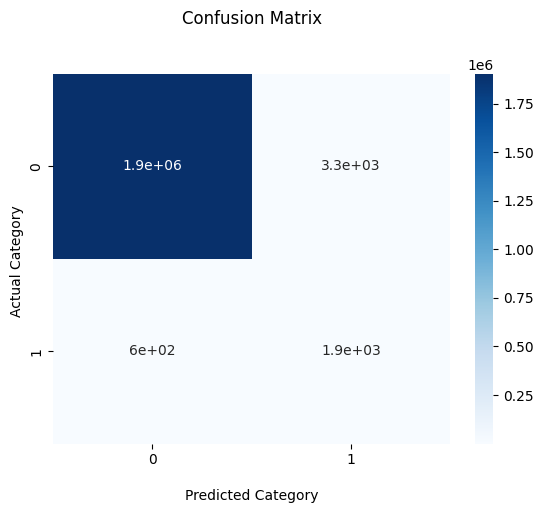

In [19]:
cm = confusion_matrix(y_test, prediction_lgb)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [20]:
predicted_labels = np.round(prediction_lgb)

# Check for incorrect predictions
incorrect_predictions = np.where(predicted_labels != y_test)[0]

# Display the rows in x_test where the model made incorrect predictions
incorrect_rows = x_test.iloc[incorrect_predictions]

print('Rows with incorrect predictions:')
print(incorrect_rows)

# for idx in incorrect_predictions:
#     print(f'Index: {idx}, Predicted: {predicted_labels[idx]}, Actual: {y_test[idx]}')

Rows with incorrect predictions:
         Type    Amount  ID_Source  Old_Balance  New_Balance  Source_State  \
371       5.0  0.001107       -1.0     0.004001     0.001672           2.0   
396       2.0  0.044404       -1.0     0.093680     0.000000           4.0   
1514      5.0  0.002221       -1.0     0.006357     0.001676           5.0   
1877      5.0  0.001312       -1.0     0.003631     0.000866           5.0   
2396      4.0  0.000050       -1.0     0.000016     0.000000           3.0   
...       ...       ...        ...          ...          ...           ...   
1904359   5.0  0.005717       -1.0     0.011527     0.000000           3.0   
1904361   5.0  0.000142       -1.0     0.000301     0.000000           2.0   
1906520   2.0  0.005504       -1.0     0.013030     0.001421           7.0   
1907045   2.0  0.005550       -1.0     0.012828     0.001123           7.0   
1907094   2.0  0.003841       -1.0     0.007842     0.000000           6.0   

         Source_City  Device_N

Undersampling the Fraud Cases to get equal ratio

In [21]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = test[test['Is_Fraud'] == 0]
df_minority = test[test['Is_Fraud'] == 1]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,              # without replacement
    n_samples=len(df_minority),# match minority class size
    random_state=42             # reproducibility
)

# Combine minority class with downsampled majority
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_test_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
df_test_balanced['Is_Fraud'].value_counts()

Is_Fraud
1    2488
0    2488
Name: count, dtype: int64

In [23]:
x_test_balanced = df_test_balanced.drop(['Is_Fraud'],axis = 1)
y_test_balanced = df_test_balanced['Is_Fraud']

In [24]:
x_test_balanced = preprocess_test(x_test_balanced,scaler, encoder)

In [25]:
prediction_lgb = model.predict(x_test_balanced)
print('Predicted labels: ', np.round(prediction_lgb)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [0 0 1 1 0 0 1 0 1 0]
Actual labels   :  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Is_Fraud, dtype: int64


In [26]:
print('Accuracy: ', accuracy_score(y_test_balanced, prediction_lgb))

Accuracy:  0.880024115755627


In [27]:
print(classification_report(y_test, prediction_lgb))

ValueError: Found input variables with inconsistent numbers of samples: [1908786, 4976]

[[2486    2]
 [ 595 1893]]


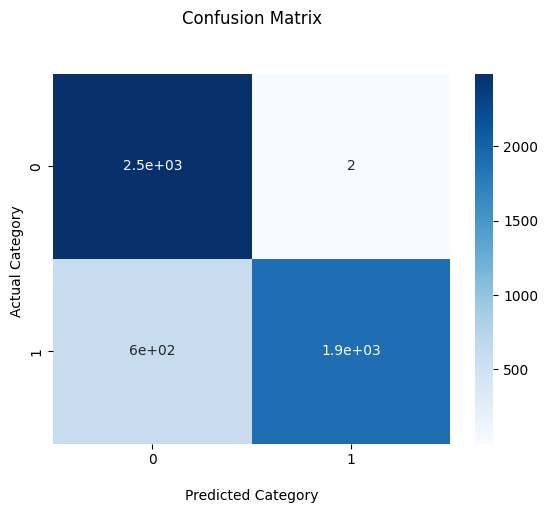

In [28]:
cm = confusion_matrix(y_test_balanced, prediction_lgb)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [29]:
x_test_balanced.columns

Index(['Type', 'Amount', 'ID_Source', 'Old_Balance', 'New_Balance',
       'Source_State', 'Source_City', 'Device_Name', 'KYC_Status',
       'Service_Charges', 'Channel', 'ID_Dest', 'Dest_State', 'Dest_City',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'weekday',
       'day_of_year'],
      dtype='object')

In [30]:
import joblib

joblib.dump(model, 'lgbm_classifier.pkl')

['lgbm_classifier.pkl']

In [31]:
joblib.dump(scaler, 'lgbm_scaler.pkl')

['lgbm_scaler.pkl']

In [32]:
joblib.dump(encoder, 'lgbm_encoder.pkl')

['lgbm_encoder.pkl']